In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
import pickle

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
cnx = sqlite3.connect('database.sqlite')

In [11]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)


In [12]:
df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [13]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [14]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [15]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [16]:
print(df['overall_rating'][df['attacking_work_rate']=='stoc'].value_counts())

62.0    8
68.0    7
55.0    6
64.0    6
65.0    6
70.0    6
71.0    5
66.0    5
52.0    4
67.0    3
63.0    3
78.0    3
74.0    3
73.0    3
76.0    2
79.0    2
75.0    2
72.0    2
47.0    2
77.0    2
56.0    1
57.0    1
58.0    1
69.0    1
53.0    1
81.0    1
83.0    1
54.0    1
60.0    1
Name: overall_rating, dtype: int64


In [17]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [18]:
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003368,0.001987,-0.002875,0.001217,-0.019149,-0.007882,-0.011295,-0.006132,-0.006343,...,-0.007731,-0.010620,-0.009555,-0.012196,-0.010689,0.013980,0.010436,0.008645,0.013563,0.014152
player_fifa_api_id,0.003368,1.000000,0.554620,-0.274089,-0.027619,-0.064183,-0.028010,-0.104655,-0.064219,-0.087743,...,-0.164171,-0.182479,-0.077979,-0.073212,-0.054321,-0.091737,-0.143113,-0.267489,-0.145119,-0.135443
player_api_id,0.001987,0.554620,1.000000,-0.322389,0.010991,-0.110620,-0.060387,-0.129488,-0.087320,-0.130140,...,-0.188077,-0.164783,-0.089998,-0.086596,-0.072889,-0.071495,-0.128573,-0.238898,-0.128707,-0.124961
overall_rating,-0.002875,-0.274089,-0.322389,1.000000,0.766757,0.357699,0.329298,0.314099,0.458361,0.361470,...,0.431137,0.393189,0.133377,0.165349,0.128889,0.027976,0.004410,0.025682,0.005709,0.005687
potential,0.001217,-0.027619,0.010991,0.766757,1.000000,0.277755,0.286684,0.207706,0.382605,0.301302,...,0.378901,0.316414,0.055758,0.083822,0.063976,-0.011250,0.004742,0.089205,0.003406,0.003962
crossing,-0.019149,-0.064183,-0.110620,0.357699,0.277755,1.000000,0.576860,0.369747,0.790150,0.637891,...,0.693227,0.571473,0.235159,0.285265,0.275467,-0.603898,-0.595610,-0.349559,-0.597625,-0.601580
finishing,-0.007882,-0.028010,-0.060387,0.329298,0.286684,0.576860,1.000000,0.373536,0.579365,0.851339,...,0.651455,0.720388,-0.284603,-0.229699,-0.260890,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,-0.011295,-0.104655,-0.129488,0.314099,0.207706,0.369747,0.373536,1.000000,0.548700,0.391638,...,0.337184,0.431336,0.461543,0.480624,0.441769,-0.665365,-0.647876,-0.391540,-0.647738,-0.651373
short_passing,-0.006132,-0.064219,-0.087320,0.458361,0.382605,0.790150,0.579365,0.548700,1.000000,0.640253,...,0.765336,0.609537,0.350171,0.415678,0.380990,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,-0.006343,-0.087743,-0.130140,0.361470,0.301302,0.637891,0.851339,0.391638,0.640253,1.000000,...,0.689852,0.711830,-0.168972,-0.106926,-0.126398,-0.508823,-0.487015,-0.279030,-0.490968,-0.492979


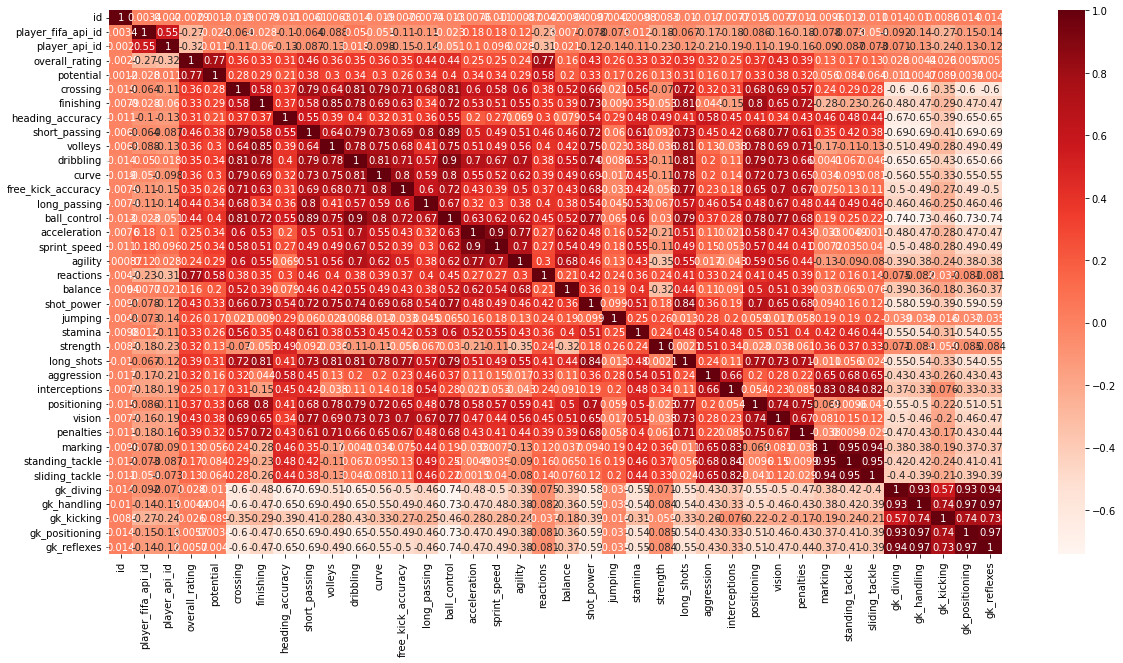

In [21]:


#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


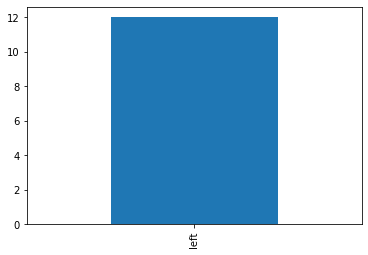

In [22]:
print(df['preferred_foot'][df['overall_rating']==94].value_counts().plot(kind='bar')) # LEFT FOOT HAS A GOOD ACCURACY

In [23]:
df['overall_rating'].describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

<AxesSubplot:>

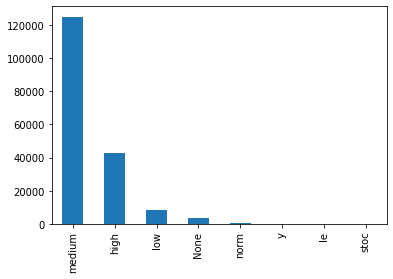

In [24]:
df['attacking_work_rate'].value_counts().plot(kind='bar')

In [25]:
df['attacking_work_rate']=df['attacking_work_rate'].fillna('None')

In [26]:
df['gk_reflexes'].describe()

count    183142.000000
mean         16.441439
std          17.198155
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          96.000000
Name: gk_reflexes, dtype: float64

In [27]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate       0
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [28]:
df['penalties']=df['penalties'].dropna()

In [29]:
df=df.dropna()

In [30]:
(df.isnull().sum())

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [31]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [32]:
X = df[features]
X

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,85.0,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,80.0,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,80.0,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,81.0,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [33]:
target = ['overall_rating']

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc=StandardScaler()

In [36]:
sc.fit(X)

StandardScaler()

In [37]:
scale_data=sc.transform(X)

In [38]:
scale_data

array([[-0.37553604, -0.35468894, -0.31180367, ..., -0.50106964,
        -0.50002984, -0.48591981],
       [-0.37553604, -0.35468894, -0.31180367, ..., -0.50106964,
        -0.50002984, -0.48591981],
       [-1.13522405, -0.35468894, -0.31180367, ..., -0.50106964,
        -0.50002984, -0.48591981],
       ...,
       [ 0.99190238,  1.09443211,  1.10570176, ...,  2.46869815,
         0.24544119,  0.2115559 ],
       [ 1.14383998,  1.09443211,  0.73820036, ...,  2.46869815,
         0.24544119,  0.2115559 ],
       [ 1.14383998,  1.09443211,  0.94820116, ...,  2.70439401,
        -0.56215243, -0.07905898]])

In [39]:
pca=PCA(n_components=4)

In [40]:
pca.fit(scale_data)

PCA(n_components=4)

In [41]:
x_pca=pca.transform(scale_data)

In [42]:
x_pca

array([[ 1.01390569,  2.69279845, -1.63214462,  0.23788814],
       [ 1.01390569,  2.69279845, -1.63214462,  0.23788814],
       [ 1.28367371,  2.04111648, -2.23158848,  0.39864247],
       ...,
       [-3.59363951, -2.59543118,  2.61420762,  0.71556549],
       [-3.21723451, -2.50086867,  2.24211639,  0.54261014],
       [-3.46988659, -2.06133026,  1.64928125,  0.42959791]])

In [43]:
x_pca

array([[ 1.01390569,  2.69279845, -1.63214462,  0.23788814],
       [ 1.01390569,  2.69279845, -1.63214462,  0.23788814],
       [ 1.28367371,  2.04111648, -2.23158848,  0.39864247],
       ...,
       [-3.59363951, -2.59543118,  2.61420762,  0.71556549],
       [-3.21723451, -2.50086867,  2.24211639,  0.54261014],
       [-3.46988659, -2.06133026,  1.64928125,  0.42959791]])

In [44]:
df1=pd.DataFrame(x_pca,columns=['Crossing','Finishing','Free_Kick_Accuracy','Heading_Accuracy'])

In [45]:
df1

,Crossing,Finishing,Free_Kick_Accuracy,Heading_Accuracy
0,1.013906,2.692798,-1.632145,0.237888
1,1.013906,2.692798,-1.632145,0.237888
2,1.283674,2.041116,-2.231588,0.398642
3,1.481445,1.932724,-2.511726,0.390132
4,1.481445,1.932724,-2.511726,0.390132
...,...,...,...,...
181260,-4.736467,-2.931209,4.009960,0.944325
181261,-3.599509,-2.755020,2.569479,0.744872
181262,-3.593640,-2.595431,2.614208,0.715565
181263,-3.217235,-2.500869,2.242116,0.542610


In [46]:
X=df1

In [47]:
y=df[target]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,shuffle=True)

In [49]:
model = LinearRegression()

model.fit(X_train, y_train)
print(
    model.score(X_train, y_train),
    model.score(X_test, y_test)
)


0.6995790977173262 0.7004396314695432


In [50]:
model.coef_

array([[-0.73520563, -0.01684154,  3.14376669,  0.57681963]])

In [51]:
model.intercept_

array([68.62586339])

In [52]:
X.columns

Index(['Crossing', 'Finishing', 'Free_Kick_Accuracy', 'Heading_Accuracy'], dtype='object')

In [53]:
df['prediction']= model.predict(X)

C:\Users\Taimoor\AppData\Local\Temp\ipykernel_2684\784155139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction']= model.predict(X)


In [54]:
df['prediction'].head()

0    62.841220
1    62.841220
2    60.862075
3    59.832901
4    59.832901
Name: prediction, dtype: float64

In [55]:
fig=px.line(df,x='overall_rating',y='prediction')
#fig.show()

In [60]:
df['prediction'].describe()

count    181265.000000
mean         68.625863
std           5.896345
min          44.351092
25%          64.661609
50%          68.527913
75%          72.514394
max          93.504853
Name: prediction, dtype: float64

In [61]:
df['overall_rating'].describe()

count    181265.000000
mean         68.621493
std           7.029845
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [43]:
pickle.dump(model, open('model.pkl','wb'))